# Dependencies

In [ ]:
import os
import graphviz
import itertools
import pydotplus
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
from io import StringIO
from subprocess import call
from datetime import datetime
import plotly.graph_objects as go
from IPython.display import Image

from matplotlib import pyplot
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import preprocessing
from sklearn.datasets import load_iris
from sklearn.tree import export_graphviz
from sklearn import tree, metrics, ensemble
from sklearn.metrics import confusion_matrix
# from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesRegressor

%matplotlib inline

In [ ]:
np.set_printoptions(
    precision = 2
)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Functions

## <code><b>plot_confusion_matrix</b></code>

In [ ]:
def plot_confusion_matrix(
      cm
    , classes
    , normalize = False
    , title     = 'Confusion matrix'
    , cmap      = plt.cm.Blues
    ):

    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt    = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(
              j
            , i
            , format(cm[i, j], fmt)
            , horizontalalignment="center"
            , color="white" if cm[i, j] > thresh else "black"
        )

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Random Forest

* Random Forest is an ensemble of Decision Trees. With a few exceptions, a <code><b>RandomForestClassifier</b></code> has all the hyperparameters of a <code><b>DecisionTreeClassifier</b></code> (to control how trees are grown), plus all the hyperparameters of a <code><b>BaggingClassifier</b></code>to control the ensemble itself.

* The Random Forest algorithm introduces extra randomness when growing trees; instead of searching for the very best feature when splitting a node, it searches for the best feature among a random subset of features. This results in a greater tree diversity, which (once again) trades a higher bias for a lower variance, generally yielding an overall better model. The following <code><b>BaggingClassifier</b></code> is roughly equivalent to the previous <code><b>RandomForestClassifier</b></code>. Run the cell below to visualize a single estimator from a random forest model, using the Iris dataset to classify the data into the appropriate species.

In [ ]:
iris = load_iris()

# Convert iris.data and iris.target to a DataFrame
iris_df = pd.DataFrame(
      data    = iris.data
    , columns = iris.feature_names
)

# Now you can use .head() to view the first few rows
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# Model (can also use single decision tree)
model = RandomForestClassifier(
    n_estimators=10
)

In [ ]:
# Train
model.fit(
      iris.data
    , iris.target
)

RandomForestClassifier(n_estimators=10)

In [ ]:
# Extract single tree
estimator = model.estimators_[5]

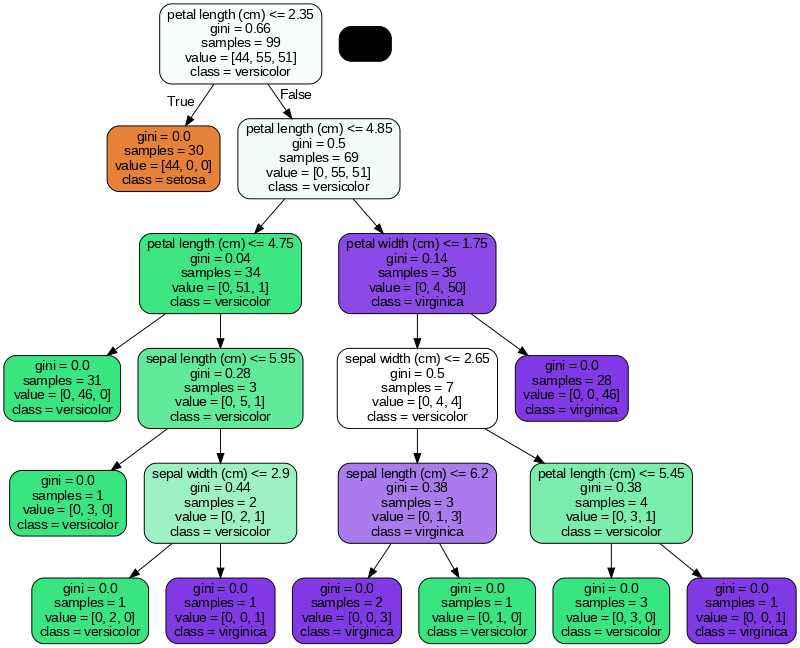

In [ ]:
# Export as ".dot" file
dot_data = StringIO()

tree.export_graphviz(
      estimator
    , out_file      = dot_data
    , feature_names = iris.feature_names
    , class_names   = iris.target_names
    , rounded       = True
    , proportion    = False
    , precision     = 2
    , filled        = True
)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Set the graph size here (e.g., '3,3')
graph.set_graph_defaults(size='"4,4"')

# Set the DPI
graph.set_dpi(200)

png_image = graph.create_png()
Image(png_image)

Notice how each split seperates the data into buckets of similar observations. This is a single tree and a relatively simple classification dataset, but the same method is used in a more complex dataset with greater depth to the trees.

# Coronavirus
Coronavirus disease (COVID-19) is an infectious disease caused by a new virus.
The disease causes respiratory illness (like the flu) with symptoms such as a cough, fever, and in more severe cases, difficulty breathing. You can protect yourself by washing your hands frequently, avoiding touching your face, and avoiding close contact (1 meter or 3 feet) with people who are unwell. An outbreak of COVID-19 started in December 2019 and at the time of the creation of this project was continuing to spread throughout the world. Many governments recommended only essential outings to public places and closed most business that do not serve food or sell essential items. An excellent <a href="https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6"><b>spatial dashboard by Johns Hopkins</b></a> shows the daily confirmed cases by country.

This case study was designed to drive home the important role that data science plays in real-world situations like this pandemic. This case study uses the Random Forest Classifier and a dataset from the South Korean cases of COVID-19 provided on <a href="https://www.kaggle.com/kimjihoo/coronavirusdataset"><b>Kaggle</b></a> to encourage research on this important topic. The goal of the case study is to build a <b>Random Forest Classifier</b> to predict the <code><b>state</b></code> of the patient.

First, please load the needed packages and modules into Python. Next, load the data into a pandas dataframe for ease of use.

## Load data

In [ ]:
df = pd.read_csv(
    '/content/drive/MyDrive/Colab Notebooks/data/14.4.PatientInfo.csv'
)

df.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released


In [ ]:
df.shape

(2218, 18)

In [ ]:
# Select the target variable
target_variable = "state"

# counts of response variable values
class_counts = df[target_variable].value_counts(dropna=False)

# Calculate class proportions
class_proportions = class_counts / len(df)

# Create a DataFrame to combine counts and proportions
class_summary = pd.DataFrame(
    {
          'Counts': class_counts
        , 'Proportion': class_proportions
    }
)

class_summary.reset_index(
    inplace=True
)

class_summary.rename(
      columns = {'index': 'Class'}
    , inplace = True
)

# Display the class summary
print(class_summary)

      Class  Counts  Proportion
0  isolated    1791    0.807484
1  released     307    0.138413
2       NaN      88    0.039675
3  deceased      32    0.014427


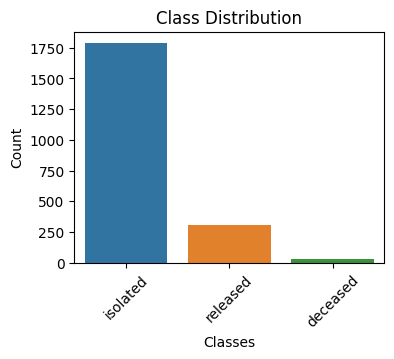

In [ ]:
plt.figure(
    figsize=(4, 3)
)

sns.barplot(
      x = class_counts.index
    , y = class_counts.values
)

plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(rotation=45)
plt.show()

 Create a new column named <code><b>n_age</b></code> which is the calculated age based on the <code><b>birth_year</b></code> column.

In [ ]:
df["n_age"] = datetime.now().year - df['birth_year']
df.head(1)

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,n_age
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released,59.0


## Handle Missing Values

Print the number of missing values by each column.

In [ ]:
df\
.isna()\
.sum()\
.sort_values(ascending=False)

disease               2199
deceased_date         2186
infection_order       2176
symptom_onset_date    2025
released_date         1995
contact_number        1807
infected_by           1749
infection_case        1055
global_num             904
n_age                  454
birth_year             454
age                    261
sex                    145
confirmed_date         141
state                   88
city                    65
province                 0
country                  0
patient_id               0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2218 entries, 0 to 2217
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          2218 non-null   int64  
 1   global_num          1314 non-null   float64
 2   sex                 2073 non-null   object 
 3   birth_year          1764 non-null   float64
 4   age                 1957 non-null   object 
 5   country             2218 non-null   object 
 6   province            2218 non-null   object 
 7   city                2153 non-null   object 
 8   disease             19 non-null     object 
 9   infection_case      1163 non-null   object 
 10  infection_order     42 non-null     float64
 11  infected_by         469 non-null    float64
 12  contact_number      411 non-null    float64
 13  symptom_onset_date  193 non-null    object 
 14  confirmed_date      2077 non-null   object 
 15  released_date       223 non-null    object 
 16  deceas

Fill the <code><b>disease</b></code> missing values with <code><b>0</b></code> and remap the <code><b>True</b></code> values to <code><b>1</b></code> .

In [ ]:
df['disease'] = df['disease']\
                .fillna(0)\
                .replace(to_replace='True', value=1)

 Fill null values in the following columns with their mean:

 <code><b>global_number</b></code> , <code><b>birth_year</b></code> , <code><b>infection_order</b></code> ,<code><b>infected_by</b></code> , and <code><b>contact_number</b></code> .

In [ ]:
fillna_mean_features = [
      'global_num'
    , 'birth_year'
    , 'infection_order'
    , 'infected_by'
    , 'contact_number'
    , 'n_age'
]

df[fillna_mean_features] = df[fillna_mean_features].fillna(df[fillna_mean_features].mean())

Now, check the number of missing values by each column again:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2218 entries, 0 to 2217
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          2218 non-null   int64  
 1   global_num          2218 non-null   float64
 2   sex                 2073 non-null   object 
 3   birth_year          2218 non-null   float64
 4   age                 1957 non-null   object 
 5   country             2218 non-null   object 
 6   province            2218 non-null   object 
 7   city                2153 non-null   object 
 8   disease             2218 non-null   object 
 9   infection_case      1163 non-null   object 
 10  infection_order     2218 non-null   float64
 11  infected_by         2218 non-null   float64
 12  contact_number      2218 non-null   float64
 13  symptom_onset_date  193 non-null    object 
 14  confirmed_date      2077 non-null   object 
 15  released_date       223 non-null    object 
 16  deceas

 Fill the rest of the missing values with any method.

In [ ]:
# filling other columns with most common class within that column
df.fillna(
      df.mode().iloc[0]
    , inplace=True
)

Check for any remaining null values.

In [ ]:
df\
.isna()\
.sum()\
.sort_values(ascending=False)

patient_id            0
infection_order       0
state                 0
deceased_date         0
released_date         0
confirmed_date        0
symptom_onset_date    0
contact_number        0
infected_by           0
infection_case        0
global_num            0
disease               0
city                  0
province              0
country               0
age                   0
birth_year            0
sex                   0
n_age                 0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2218 entries, 0 to 2217
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          2218 non-null   int64  
 1   global_num          2218 non-null   float64
 2   sex                 2218 non-null   object 
 3   birth_year          2218 non-null   float64
 4   age                 2218 non-null   object 
 5   country             2218 non-null   object 
 6   province            2218 non-null   object 
 7   city                2218 non-null   object 
 8   disease             2218 non-null   object 
 9   infection_case      2218 non-null   object 
 10  infection_order     2218 non-null   float64
 11  infected_by         2218 non-null   float64
 12  contact_number      2218 non-null   float64
 13  symptom_onset_date  2218 non-null   object 
 14  confirmed_date      2218 non-null   object 
 15  released_date       2218 non-null   object 
 16  deceas

In [ ]:
df.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,n_age
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,0,overseas inflow,1.0,2.600789e+09,75.0,2020-01-22,2020-01-23,2020-02-05,2020-02-23,released,59.0
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,0,overseas inflow,1.0,2.600789e+09,31.0,2020-02-27,2020-01-30,2020-03-02,2020-02-23,released,36.0
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,0,contact with patient,2.0,2.002000e+09,17.0,2020-02-27,2020-01-30,2020-02-19,2020-02-23,released,59.0
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,0,overseas inflow,1.0,2.600789e+09,9.0,2020-01-26,2020-01-30,2020-02-15,2020-02-23,released,32.0
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,0,contact with patient,2.0,1.000000e+09,2.0,2020-02-27,2020-01-31,2020-02-24,2020-02-23,released,31.0


Remove date columns from the dataset.


In [ ]:
df = df.drop(
    [
          'symptom_onset_date'
        , 'confirmed_date'
        , 'released_date'
        , 'deceased_date'
    ]
    , axis =1
)

Review the count and proportion (percentage) of unique values by each column.

In [ ]:
# Calculate the counts and proportions
counts      =  df.nunique()
proportions = (df.nunique() / df.shape[0])

# Combine the counts and proportions into one table
combined_table = pd.concat(
      [counts, proportions]
    , axis=1
)

combined_table.columns = [
      'Counts'
    , 'Proportions'
]

# Sort the table by counts in descending order
combined_table = combined_table.sort_values(
      by        = 'Counts'
    , ascending = False
)

print(combined_table)

                 Counts  Proportions
patient_id         2218     1.000000
global_num         1304     0.587917
infected_by         207     0.093327
city                134     0.060415
birth_year           97     0.043733
n_age                97     0.043733
contact_number       73     0.032913
province             17     0.007665
infection_case       16     0.007214
age                  11     0.004959
infection_order       7     0.003156
country               4     0.001803
state                 3     0.001353
sex                   2     0.000902
disease               2     0.000902


Review the range of values per column.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
patient_id,2218.0,4.014678e+09,2.192419e+09,1.000000e+09,1.700000e+09,6.001000e+09,6.004000e+09,7.000000e+09
global_num,2218.0,4.664817e+03,2.211785e+03,1.000000e+00,4.205250e+03,4.664817e+03,5.900250e+03,8.717000e+03
birth_year,2218.0,1.974989e+03,1.731123e+01,1.916000e+03,1.965000e+03,1.974989e+03,1.988000e+03,2.020000e+03
infection_order,2218.0,2.285714e+00,1.706622e-01,1.000000e+00,2.285714e+00,2.285714e+00,2.285714e+00,6.000000e+00
infected_by,2218.0,2.600789e+09,7.216328e+08,1.000000e+09,2.600789e+09,2.600789e+09,2.600789e+09,6.113000e+09
contact_number,2218.0,2.412895e+01,3.917141e+01,0.000000e+00,2.412895e+01,2.412895e+01,2.412895e+01,1.160000e+03
n_age,2218.0,4.801134e+01,1.731123e+01,3.000000e+00,3.500000e+01,4.801134e+01,5.800000e+01,1.070000e+02


## Check for duplicated rows

In [ ]:
duplicateRowsDF = df[df.duplicated()]
duplicateRowsDF

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,state,n_age


Print the categorical columns and their associated levels.

In [ ]:
dfo = df.select_dtypes(
      include=['object']
    , exclude=['datetime']
)

dfo.shape

(2218, 8)

In [ ]:
# get levels for all variables
vn         = pd.DataFrame(dfo.nunique()).reset_index()
vn.columns = ['VarName', 'LevelsCount']
vn.sort_values(by='LevelsCount', ascending =False)
vn

,VarName,LevelsCount
0,sex,2
1,age,11
2,country,4
3,province,17
4,city,134
5,disease,2
6,infection_case,16
7,state,3


Plot the correlation heat map for the features.

<ipython-input-231-32fb7c35b8f6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


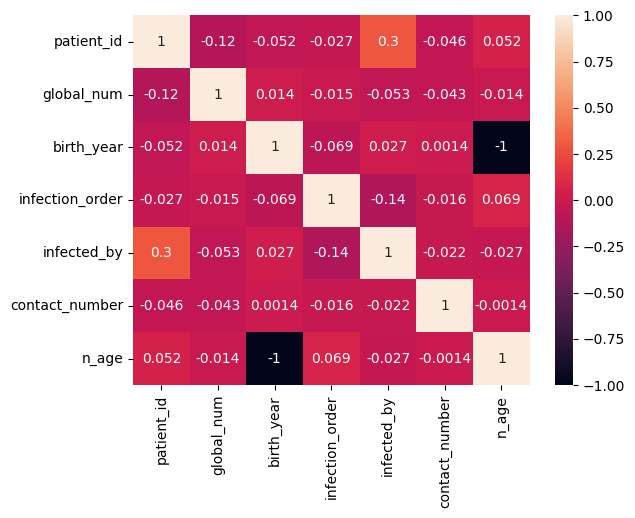

In [ ]:
corr = df.corr()

sns.heatmap(
      corr
    , xticklabels=corr.columns
    , yticklabels=corr.columns
    , annot=True
)

plt.show()

Plot the boxplots to check for outliers.

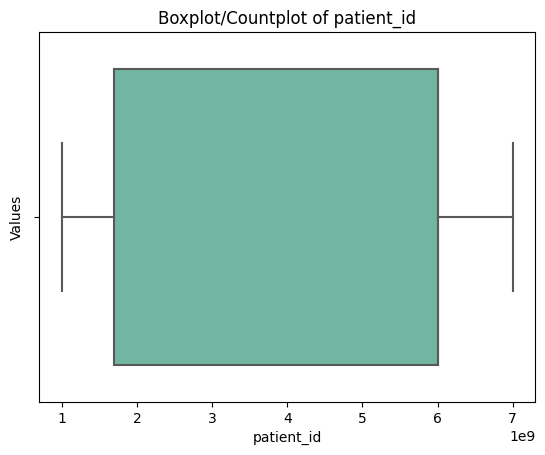

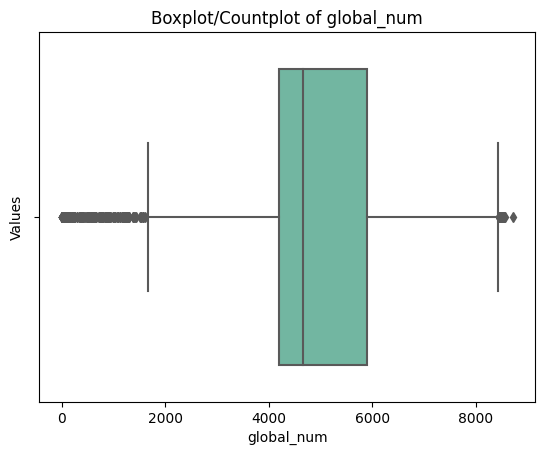

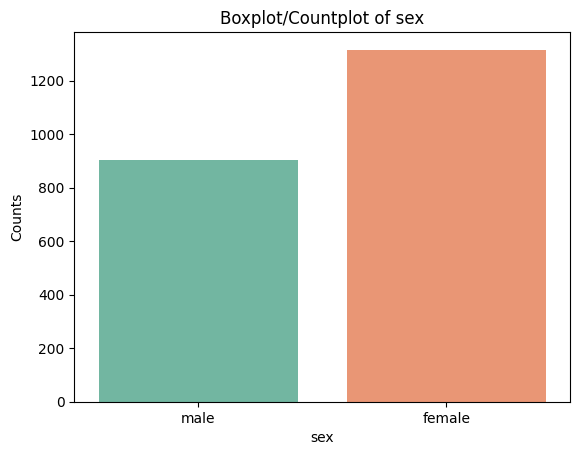

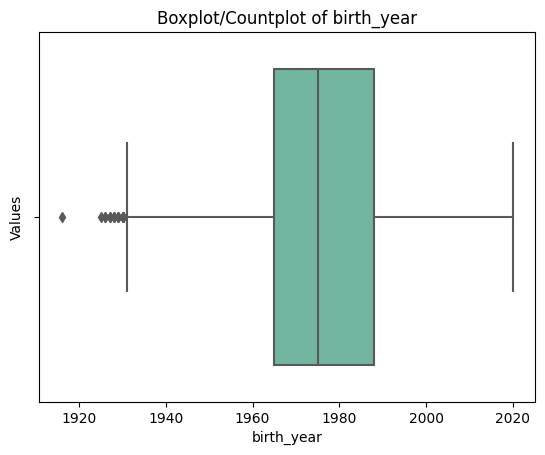

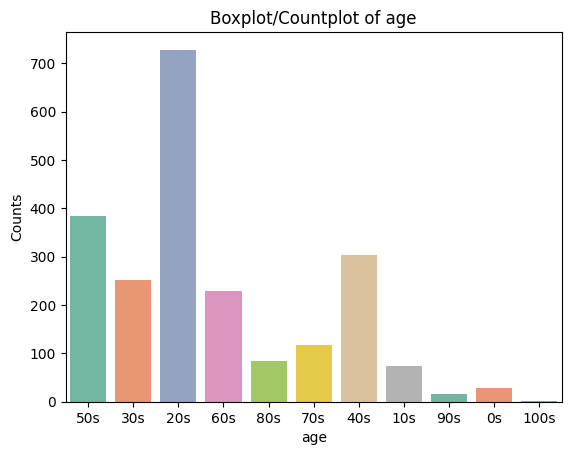

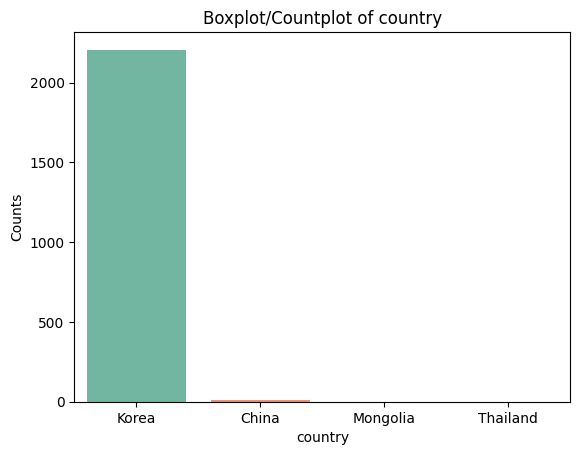

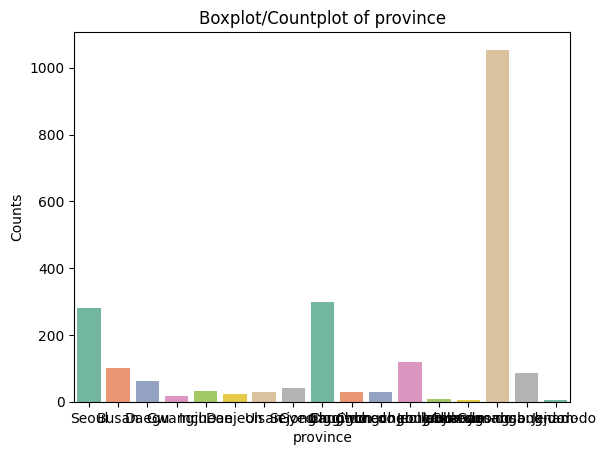

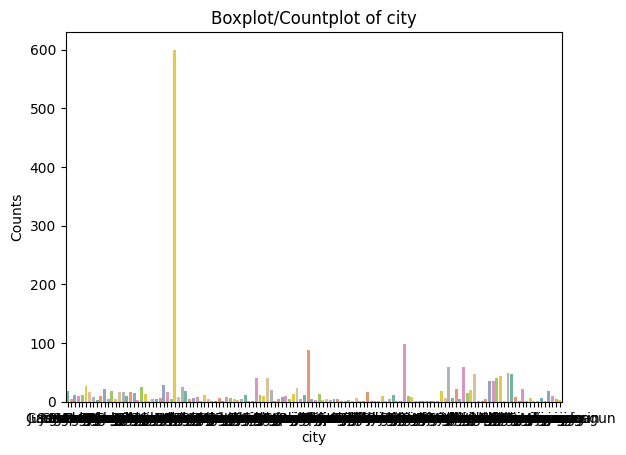

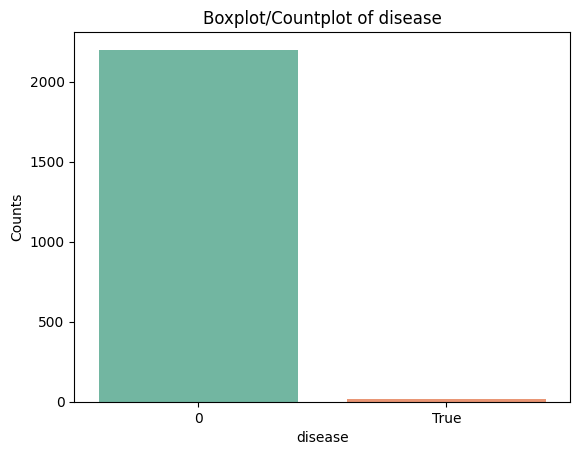

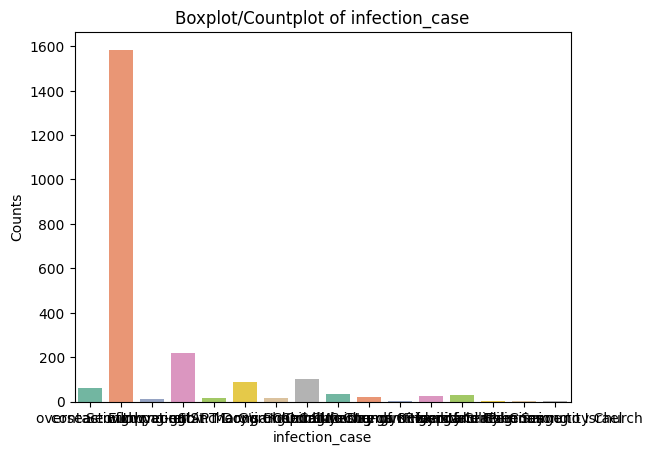

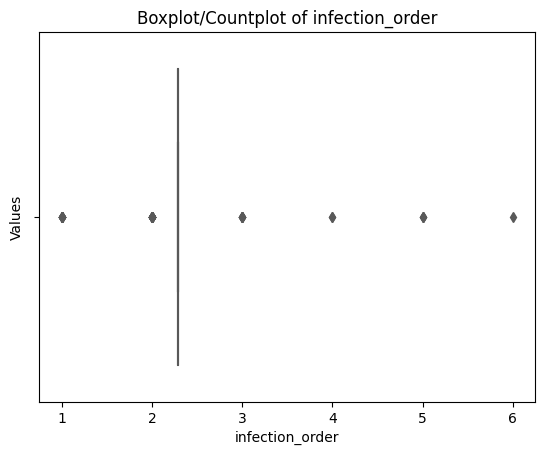

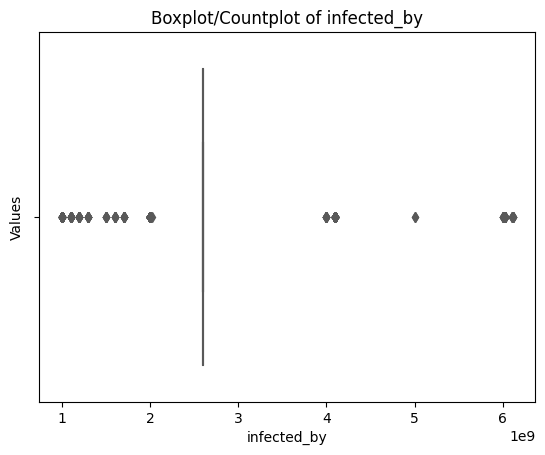

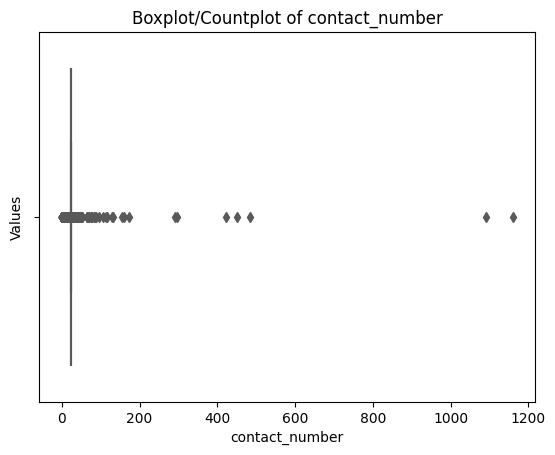

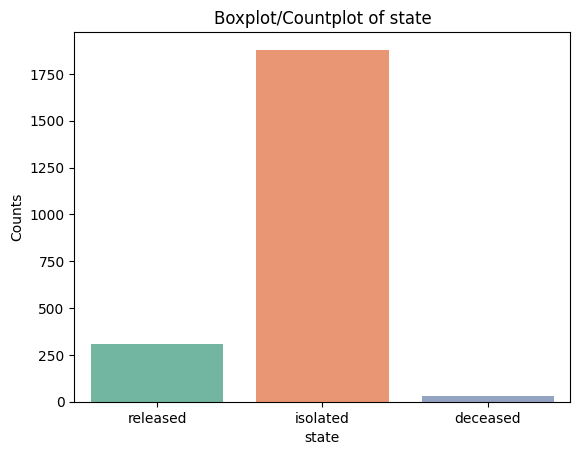

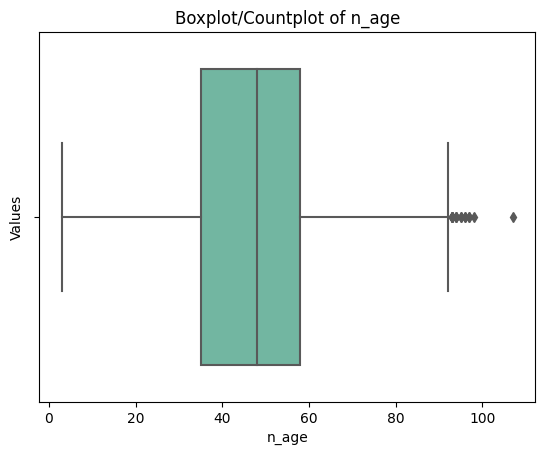

In [ ]:
# Iterate through all columns
for col in df.columns:
    # -------------------------------------------------------------------------
    # Create a new figure for each boxplot
    plt.figure()
    # -------------------------------------------------------------------------
    # Check if the column is numeric
    if pd.api.types.is_numeric_dtype(df[col]):
        sns.boxplot(
              data    = df
            , x       = col
            , orient  = 'h'
            , palette = 'Set2'
        )

    # Treat non-numeric columns as categorical
    else:
        sns.countplot(
              data    = df
            , x       = col
            , palette = 'Set2'
        )
    # -------------------------------------------------------------------------
    plt.title(f'Boxplot/Countplot of {col}')
    plt.ylabel('Values' if pd.api.types.is_numeric_dtype(df[col]) else 'Counts')
    # -------------------------------------------------------------------------
    plt.show()

**<font color='teal'> Create dummy features for object type features. </font>**

In [ ]:
y = df['state']
X = pd.get_dummies(df.loc [: , df.columns != 'state'])

## Train/Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
      X
    , y
    , test_size=0.2
    , random_state=1
)

## Scale data to prep for model creation

In [ ]:
# scale data
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing\
         .StandardScaler()\
         .fit(X_train)

X_train_scaled=scaler.transform(
    X_train
)

X_test_scaled=scaler.transform(
    X_test
)

## Fit Random Forest Classifier
The fit model shows an overall accuracy of 80% which is great and indicates our model was effectively able to identify the status of a patients in the South Korea dataset.

In [ ]:
# Create a Random Forest Classifier with specified parameters
clf = RandomForestClassifier(
      n_estimators = 300  # Number of decision trees in the forest
    , random_state = 1
    , n_jobs       = -1   # Number of CPU cores to use (-1 = all available cores)
)

# Fit the classifier to the training data
model_res = clf.fit(
      X_train_scaled
    , y_train
)

# Make predictions on the test data
y_pred = model_res.predict(
    X_test_scaled
)

# Get predicted probabilities for each class
y_pred_prob = model_res.predict_proba(
    X_test_scaled
)

# Extract the probabilities for the positive class
lr_probs = y_pred_prob[:,1]

# Calculate the accuracy score of the model
ac = accuracy_score(
      y_test
    , y_pred
)

# Calculate the F1-score of the model with weighted averaging
f1 = f1_score(
      y_test
    , y_pred
    , average='weighted' # Always use weighted averaging for multiclass problems
)

print('Random Forest: accuracy=%.3f' % (ac))
print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: accuracy=0.860
Random Forest: f1-score=0.825


## Confusion Matrix Plots
Confusion matrices are great ways to review your <b>model performance</b> for a <b>multi-class</b> classification problem. Being able to identify which class the <b>misclassified observations</b> end up in is a great way to determine if you need to build additional features to improve your overall model.

In the example below, we plot a <b>regular counts Confusion Matrix</b> as well as a <b>Weighted Percent Confusion Matrix</b>. The percent confusion matrix is particulary helpful when you have unbalanced class sizes.

In [ ]:
class_names = list(set(y_train))
class_names

['deceased', 'released', 'isolated']

In [ ]:
cm = confusion_matrix(
      y_test
    , y_pred
)

Confusion matrix, without normalization
[[  7   0   0]
 [  0 362   6]
 [  0  56  13]]


<Figure size 640x480 with 0 Axes>

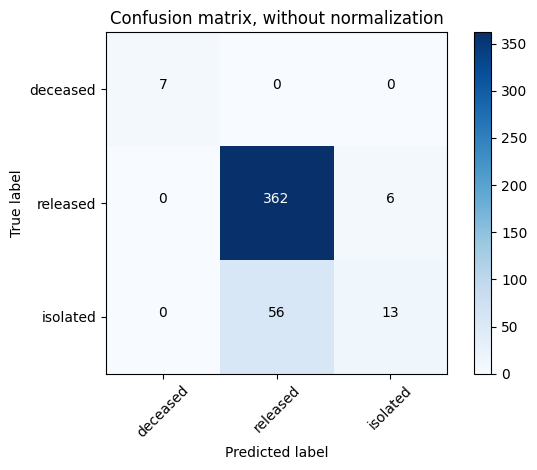

In [ ]:
# Plot regular confusion matrix
plt.figure()

plot_confusion_matrix(
      cm
    , classes = class_names
    , title   = 'Confusion matrix, without normalization'
)

plt.show()

Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.98 0.02]
 [0.   0.81 0.19]]


<Figure size 640x480 with 0 Axes>

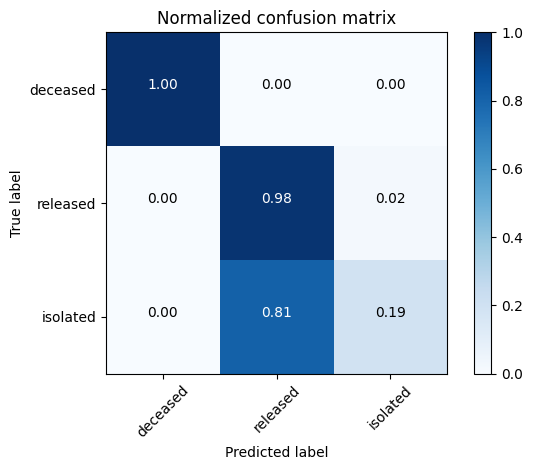

In [ ]:
# Plot Weight Percent (Normalized) Confusion Matrix
plt.figure()

plot_confusion_matrix(
      cm
    , classes   = class_names
    , title     = 'Normalized confusion matrix'
    , normalize = True
)

plt.show()

## Feature importances
The random forest algorithm can be used as a regression or classification model. In either case it tends to be a bit of a black box, where understanding what's happening under the hood can be difficult. Plotting the feature importances is one way that you can gain a perspective on which features are driving the model predictions.

In [ ]:
feature_importance = 100.0 * (clf.feature_importances_ / clf.feature_importances_.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]
pos = np.arange(sorted_idx.size) + 0.5
print(pos.size)

30


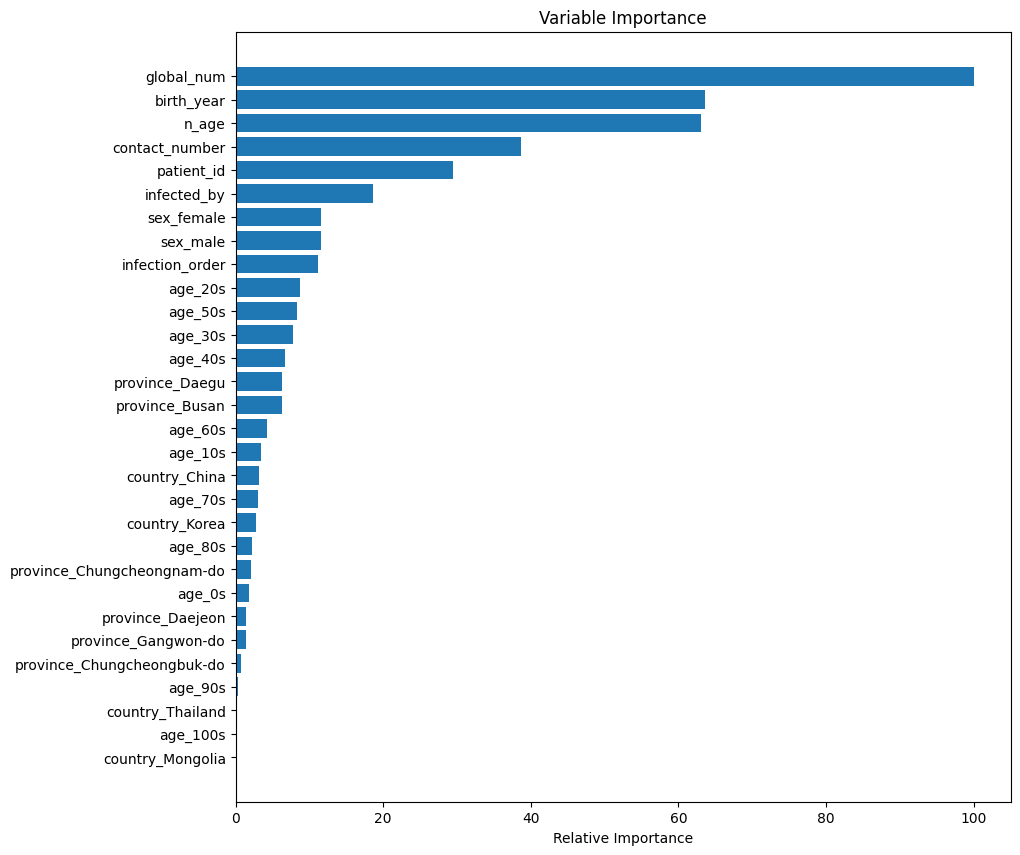

In [ ]:
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Feature Importance')
plt.show()

The popularity of random forest is primarily due to how well it performs in a multitude of data situations. It tends to handle highly correlated features well, where as a linear regression model would not. In this case study we demonstrate the performance ability even with only a few features and almost all of them being highly correlated with each other.
Random Forest is also used as an efficient way to investigate the importance of a set of features with a large data set. Consider random forest to be one of your first choices when building a decision tree, especially for multiclass classifications.